<a href="https://colab.research.google.com/github/BranDee322/Data-Analysis-For-Online-Store/blob/main/Data_analysis_for_online_store.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing libraries and google drive to get the dataset**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import os
from google.colab import drive

#mounting google drive
drive.mount('/content/drive')

# zip file directory
zip_path = "/content/drive/MyDrive/Mate/dataset.zip"
extract_path = "/content/dataset"

# unpacking zip file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

#check if zip file is there
print("Folder has:", os.listdir(extract_path))




Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Folder has: ['13. Final project']


**Getting Countries, Products, Events from dataset**

In [ ]:
final_project_path = os.path.join(extract_path, "13. Final project")

# downloading files
df_countries = pd.read_csv(os.path.join(final_project_path, "countries.csv"))
df_products = pd.read_csv(os.path.join(final_project_path, "products.csv"))
df_events = pd.read_csv(os.path.join(final_project_path, "events.csv"))

# first 5 rows of each table
print("\n===== Countries =====\n", df_countries.head())
print("\n===== Products =====\n", df_products.head())
print("\n===== Events =====\n", df_events.head())


===== Countries =====
              name alpha-2 alpha-3   region       sub-region
0     Afghanistan      AF     AFG     Asia    Southern Asia
1   Åland Islands      AX     ALA   Europe  Northern Europe
2         Albania      AL     ALB   Europe  Southern Europe
3         Algeria      DZ     DZA   Africa  Northern Africa
4  American Samoa      AS     ASM  Oceania        Polynesia

===== Products =====
      id        item_type
0  2103           Cereal
1  7940        Household
2  2455          Clothes
3  1270        Beverages
4  8681  Office Supplies

===== Events =====
     Order ID Order Date   Ship Date Order Priority Country Code  Product ID  \
0  100640618  10/8/2014  10/18/2014              M          NOR        2103   
1  100983083  8/11/2016   8/11/2016              C          SRB        2103   
2  101025998  7/18/2014   8/11/2014              M          NaN        7940   
3  102230632  5/13/2017   6/13/2017              L          MNE        2455   
4  103435266  8/11/2012   9

*From this we can see that we can connect data through Product Id column in "Events" and id column in "Products", and Country Code in "Events" with alpha-3 in "Countries"*


**Cheking Missing Data**

In [ ]:

print("\n===== Missing Values in Countries =====")
print(df_countries.isnull().sum())

print("\n===== Missing Values in Products =====")
print(df_products.isnull().sum())

print("\n===== Missing Values in Events =====")
print(df_events.isnull().sum())



===== Missing Values in Countries =====
name          0
alpha-2       1
alpha-3       0
region        1
sub-region    1
dtype: int64

===== Missing Values in Products =====
id           0
item_type    0
dtype: int64

===== Missing Values in Events =====
Order ID           0
Order Date         0
Ship Date          0
Order Priority     0
Country Code      82
Product ID         0
Sales Channel      0
Units Sold         2
Unit Price         0
Unit Cost          0
dtype: int64


*Countries miss just 1 value in alpha-2, region and sub-region, Products has no missing values, and Events has 82 missed values in Country Code and 2 values in unit sold*

**Handling Missing Data**

In [ ]:
#since there are only 1 of each missing value in countries we will drop them
df_countries = df_countries.dropna()
print("Missing Values In Countries Are Dropped")

# country code column is important for data connectivity, so will check if it is possible to replace it
df_events[df_events['Order ID'] == 101025998]
df_events[df_events['Product ID'] == 7940]

#we can see that products with same id are selling in different countries, so will replace NaN to "Unknown"
df_events['Country Code'] = df_events['Country Code'].fillna("Unknown")
print("Missing Values In Country Code Are Replaced To Unknown")

#changing units sold to 0
df_events['Units Sold'] = df_events['Units Sold'].fillna(0)
print("Missing Values In Units Sold Are Replaced To 0")

#final check
print("\n===== Check =====")
print(df_countries.isnull().sum())
print(df_events.isnull().sum())


Missing Values In Countries Are Dropped
Missing Values In Country Code Are Replaced To Unknown
Missing Values In Units Sold Are Replaced To 0

===== Check =====
name          0
alpha-2       0
alpha-3       0
region        0
sub-region    0
dtype: int64
Order ID          0
Order Date        0
Ship Date         0
Order Priority    0
Country Code      0
Product ID        0
Sales Channel     0
Units Sold        0
Unit Price        0
Unit Cost         0
dtype: int64


**Checking Data Types**

In [ ]:
print("\n===== Data Types in Countries =====")
print(df_countries.dtypes)

print("\n===== Data Types in Products =====")
print(df_products.dtypes)

print("\n===== Data Types in Events =====")
print(df_events.dtypes)



===== Data Types in Countries =====
name          object
alpha-2       object
alpha-3       object
region        object
sub-region    object
dtype: object

===== Data Types in Products =====
id            int64
item_type    object
dtype: object

===== Data Types in Events =====
Order ID            int64
Order Date         object
Ship Date          object
Order Priority     object
Country Code       object
Product ID          int64
Sales Channel      object
Units Sold        float64
Unit Price        float64
Unit Cost         float64
dtype: object


*We can see that Order Date and Ship Date are object, which should be changed to datetime, the rest of data types are ok*

**Changing Data Type**

In [ ]:
df_events['Order Date'] = pd.to_datetime(df_events['Order Date'])
df_events['Ship Date'] = pd.to_datetime(df_events['Ship Date'])
print("Data Converted")
print("\n===== Data Types in Events =====")
print(df_events.dtypes)



Data Converted

===== Data Types in Events =====
Order ID                   int64
Order Date        datetime64[ns]
Ship Date         datetime64[ns]
Order Priority            object
Country Code              object
Product ID                 int64
Sales Channel             object
Units Sold               float64
Unit Price               float64
Unit Cost                float64
dtype: object


**Checking For Duplicates**

In [ ]:
print("\n===== Checking For Duplicates =====")
print("Countries:", df_countries.duplicated().sum())
print("Products:", df_products.duplicated().sum())
print("Events:", df_events.duplicated().sum())



===== Checking For Duplicates =====
Countries: 0
Products: 0
Events: 0


*There are no duplicates*

**Checking Data For Anomalies, Such as Unit Price too high/low, Unit Sold < 0 etc**

In [ ]:
print("\n===== Checking for Negative or Zero Units Sold =====")
print(df_events[df_events['Units Sold'] <= 0])

df_events = df_events[df_events['Units Sold'] > 0]

print("\n===== Checking for Zero Units Sold After Deletion =====")
print(df_events[df_events['Units Sold'] == 0])





===== Checking for Negative or Zero Units Sold =====
      Order ID Order Date  Ship Date Order Priority Country Code  Product ID  \
183  217165648 2014-05-20 2014-06-08              M          ESP        8875   
319  309655511 2014-05-05 2014-05-21              C          HRV        3127   

    Sales Channel  Units Sold  Unit Price  Unit Cost  
183       Offline         0.0      421.89     364.69  
319       Offline         0.0       81.73      56.67  

===== Checking for Zero Units Sold After Deletion =====
Empty DataFrame
Columns: [Order ID, Order Date, Ship Date, Order Priority, Country Code, Product ID, Sales Channel, Units Sold, Unit Price, Unit Cost]
Index: []


*There are 2 cases with Units Sold == 0, this might indicate return or canceled purchase, but since we don`t know, we will delete it*

In [ ]:
print("\n===== Checking for Negative or Extremely High Prices and Costs =====")
print(df_events[df_events['Unit Price'] <= 0])
print(df_events[df_events['Unit Cost'] <= 0])

print("\n===== Checking for Invalid Dates =====")
print(df_events[df_events['Ship Date'] < df_events['Order Date']])




===== Checking for Negative or Extremely High Prices and Costs =====
Empty DataFrame
Columns: [Order ID, Order Date, Ship Date, Order Priority, Country Code, Product ID, Sales Channel, Units Sold, Unit Price, Unit Cost]
Index: []
Empty DataFrame
Columns: [Order ID, Order Date, Ship Date, Order Priority, Country Code, Product ID, Sales Channel, Units Sold, Unit Price, Unit Cost]
Index: []

===== Checking for Invalid Dates =====
Empty DataFrame
Columns: [Order ID, Order Date, Ship Date, Order Priority, Country Code, Product ID, Sales Channel, Units Sold, Unit Price, Unit Cost]
Index: []


*There are no more anomalies*

**We Can Porceed To Data Analysis/Visualisation. First Of All Lets Merge Data Set**

In [ ]:
#joining events + products
df_merged = df_events.merge(df_products, left_on="Product ID", right_on="id", how="left")

#both data sets contain products id, so we delete "id"
df_merged = df_merged.drop(columns=["id"])

#adding countries to df_merged
df_merged = df_merged.merge(df_countries, left_on="Country Code", right_on="alpha-3", how="left")

#since country code is in "Events" we can delete alpha-3 and alph-2
df_merged = df_merged.drop(columns=["alpha-2", "alpha-3"])




**Final Table**

In [ ]:
print(df_merged.head())
print("\n===== DataFrame Shape =====")
print(df_merged.shape)


    Order ID Order Date  Ship Date Order Priority Country Code  Product ID  \
0  100640618 2014-10-08 2014-10-18              M          NOR        2103   
1  100983083 2016-08-11 2016-08-11              C          SRB        2103   
2  101025998 2014-07-18 2014-08-11              M      Unknown        7940   
3  102230632 2017-05-13 2017-06-13              L          MNE        2455   
4  103435266 2012-08-11 2012-09-18              H          SRB        1270   

  Sales Channel  Units Sold  Unit Price  Unit Cost  item_type        name  \
0        Online       650.0      205.70     117.11     Cereal      Norway   
1       Offline      1993.0      205.70     117.11     Cereal      Serbia   
2        Online      4693.0      668.27     502.54  Household         NaN   
3        Online      1171.0      109.28      35.84    Clothes  Montenegro   
4       Offline      7648.0       47.45      31.79  Beverages      Serbia   

   region       sub-region  
0  Europe  Northern Europe  
1  Europe 

*We have an issue, there are some Nan values now, this because country code has no relation to "Countries", lets check if it affected whole dataset**


In [ ]:
missing_countries = df_merged[df_merged['name'].isnull()]['Country Code'].unique()
print(missing_countries)
#other values were not affected, lets change name, region and subregion to "Unknows" as well
df_merged[['name', 'region', 'sub-region']] = df_merged[['name', 'region', 'sub-region']].fillna("Unknown")



['Unknown']


**Final Check**

In [ ]:
print(df_merged.head())
print("\n===== DataFrame Shape =====")
print(df_merged.shape)

    Order ID Order Date  Ship Date Order Priority Country Code  Product ID  \
0  100640618 2014-10-08 2014-10-18              M          NOR        2103   
1  100983083 2016-08-11 2016-08-11              C          SRB        2103   
2  101025998 2014-07-18 2014-08-11              M      Unknown        7940   
3  102230632 2017-05-13 2017-06-13              L          MNE        2455   
4  103435266 2012-08-11 2012-09-18              H          SRB        1270   

  Sales Channel  Units Sold  Unit Price  Unit Cost  item_type        name  \
0        Online       650.0      205.70     117.11     Cereal      Norway   
1       Offline      1993.0      205.70     117.11     Cereal      Serbia   
2        Online      4693.0      668.27     502.54  Household     Unknown   
3        Online      1171.0      109.28      35.84    Clothes  Montenegro   
4       Offline      7648.0       47.45      31.79  Beverages      Serbia   

    region       sub-region  
0   Europe  Northern Europe  
1   Euro

*Everthing is okay now, we can start analysis*

**Key company performance metrics**

In [ ]:
#Total Orders
total_orders = df_merged.shape[0]
print("Total Orders:", total_orders)

#Total Units sold
total_units_sold = df_merged['Units Sold'].sum()
print("Total Units Sold:", total_units_sold)

#Total Revenue
total_revenue = (df_merged['Units Sold'] * df_merged['Unit Price']).sum()
print("Total Revenue:", total_revenue)

#Total Profit
df_merged['Profit'] = (df_merged['Unit Price'] - df_merged['Unit Cost']) * df_merged['Units Sold']
total_profit = df_merged['Profit'].sum()
print("Total Profit ($):", round(total_profit, 2))

#Operating Countries
covered_countries = df_merged[df_merged['Country Code'] != "Unknown"]['Country Code'].nunique()
print("Covered Countries:", covered_countries)

#Total Categories
total_product_categories = df_merged['item_type'].nunique()
print("Total Product Categories:", total_product_categories)

#Offline VS Online
sales_channel_distribution = df_merged['Sales Channel'].value_counts(normalize=True) * 100
print("Online Sales (%):", round(sales_channel_distribution.get('Online', 0), 2))
print("Offline Sales (%):", round(sales_channel_distribution.get('Offline', 0), 2))

#AOV
average_order_value = df_merged.groupby('Order ID')['Profit'].sum().mean()
print("Average Order Value ($):", round(average_order_value, 2))






Total Orders: 1328
Total Units Sold: 6576524.0
Total Revenue: 1702129408.21
Total Profit ($): 501434459.0
Covered Countries: 45
Total Product Categories: 12
Online Sales (%): 49.7
Offline Sales (%): 50.08
Average Order Value ($): 377586.19


**Start Visualisations**

In [ ]:
#Working with sales by Product categories
#First of all grouping dataframe by products (using aggregation)
product_sales = df_merged.groupby("item_type").agg({
    "Units Sold": "sum",
    "Profit": "sum",
    "Unit Price": "mean",
    "Unit Cost": "mean"
}).reset_index()

**Top 10 categories by Unit Sold**

<Figure size 1200x500 with 0 Axes>

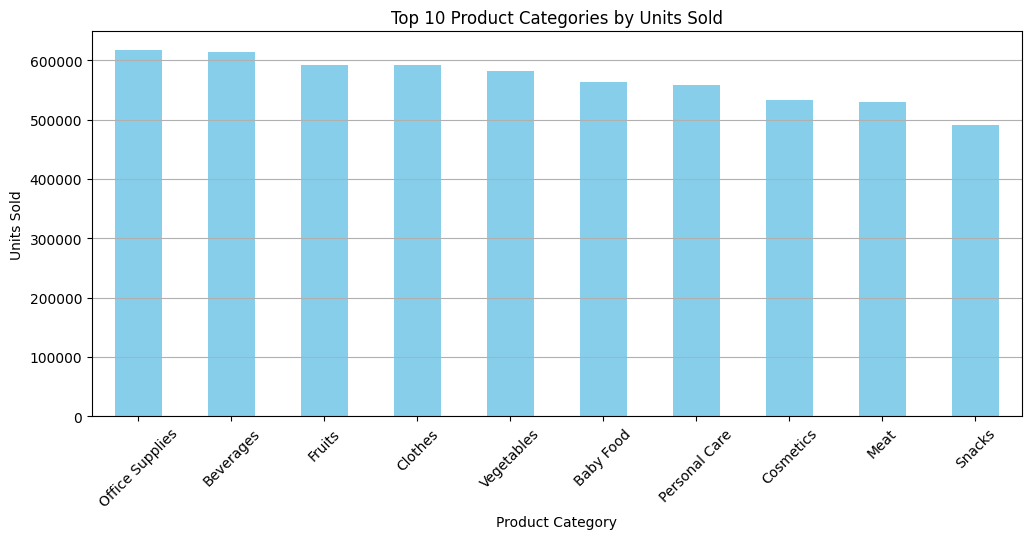

In [ ]:
plt.figure(figsize=(12, 5))
product_sales.sort_values("Units Sold", ascending=False).head(10).plot(
    x="item_type", y="Units Sold", kind="bar", figsize=(12, 5), legend=False, color="skyblue")
plt.title("Top 10 Product Categories by Units Sold")
plt.xlabel("Product Category")
plt.ylabel("Units Sold")
plt.xticks(rotation=45)
plt.grid(axis="y")
plt.show()

*Office Supplies and Beverages dominate in total units sold, meaning demand is stable for both essential goods and consumables. Meanwhile, Snacks are at the bottom, suggesting they might be less of a priority for customers*

**Top 10 By Profit**

<Figure size 1200x500 with 0 Axes>

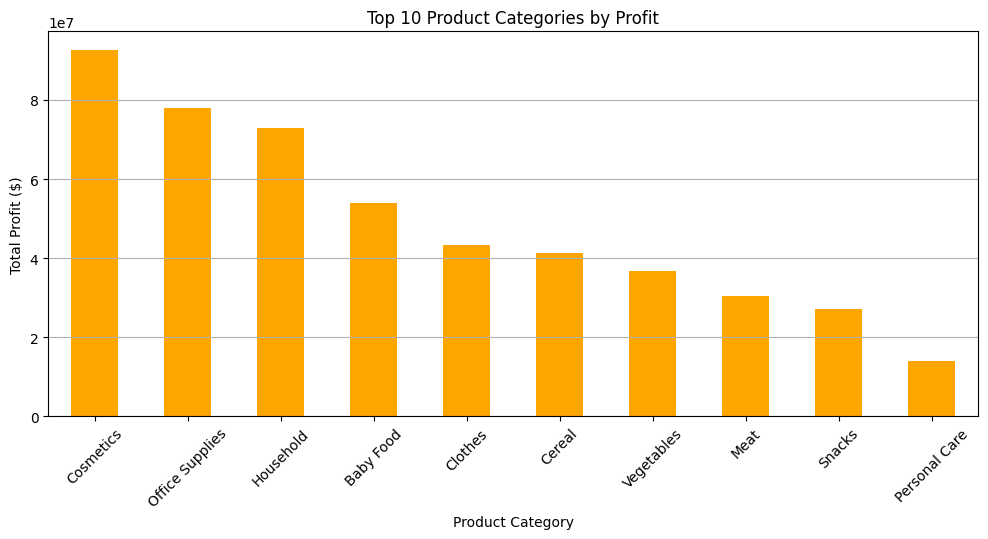

In [ ]:
plt.figure(figsize=(12, 5))
product_sales.sort_values("Profit", ascending=False).head(10).plot(
    x="item_type", y="Profit", kind="bar", figsize=(12, 5), legend=False, color="orange")
plt.title("Top 10 Product Categories by Profit")
plt.xlabel("Product Category")
plt.ylabel("Total Profit ($)")
plt.xticks(rotation=45)
plt.grid(axis="y")
plt.show()

*Cosmetics lead in total profit, proving that high-margin products outperform in revenue generation. Meanwhile, Personal Care lags behind, indicating lower profitability despite potential demand*

**Total Cost By Category**


<Figure size 1200x500 with 0 Axes>

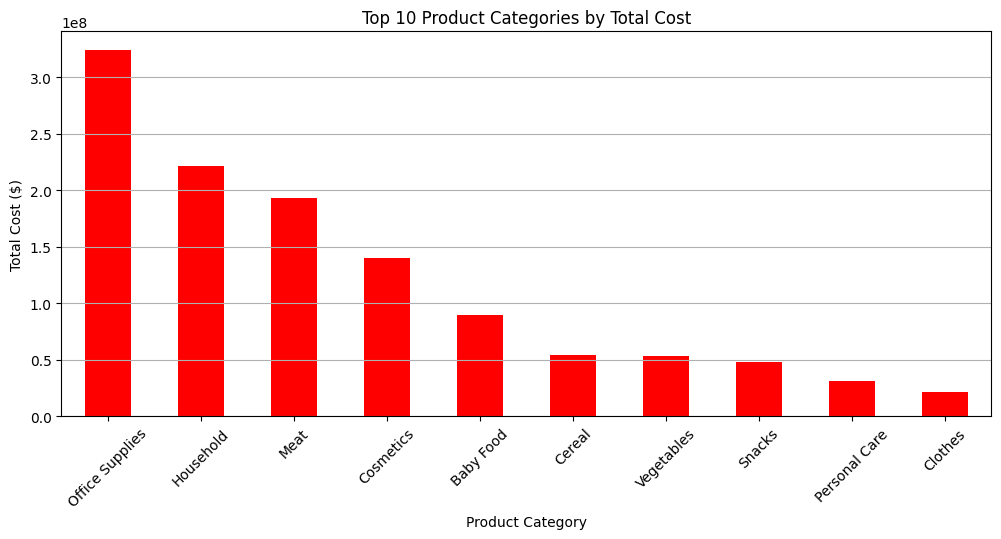

In [ ]:
product_sales["Total Cost"] = product_sales["Unit Cost"] * product_sales["Units Sold"]
plt.figure(figsize=(12, 5))
product_sales.sort_values("Total Cost", ascending=False).head(10).plot(
    x="item_type", y="Total Cost", kind="bar", figsize=(12, 5), legend=False, color="red")
plt.title("Top 10 Product Categories by Total Cost")
plt.xlabel("Product Category")
plt.ylabel("Total Cost ($)")
plt.xticks(rotation=45)
plt.grid(axis="y")
plt.show()

*Office Supplies and Household have the highest total costs, suggesting they require significant investment. Meanwhile, Clothes and Personal Care have much lower costs, potentially making them easier to scale*

**Product popularity**

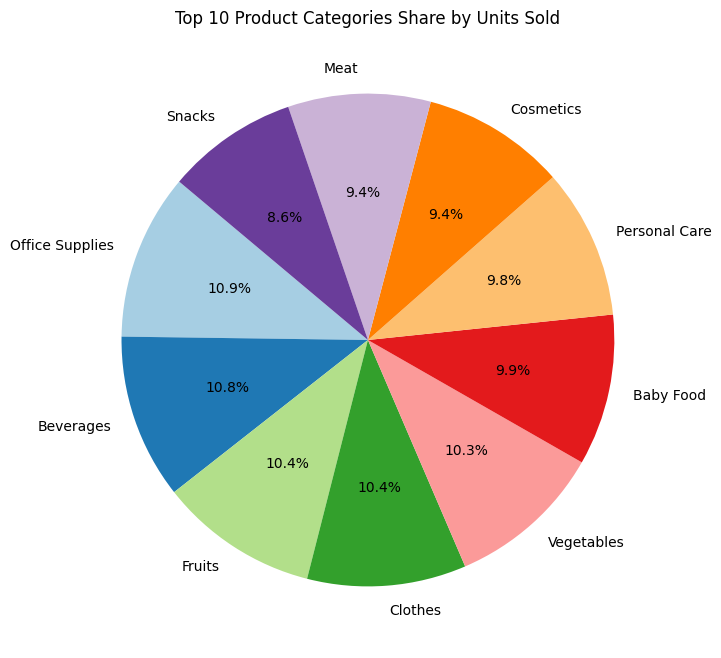

In [ ]:
plt.figure(figsize=(8, 8))
plt.pie(product_sales.sort_values("Units Sold", ascending=False).head(10)["Units Sold"],
        labels=product_sales.sort_values("Units Sold", ascending=False).head(10)["item_type"],
        autopct="%1.1f%%", startangle=140, colors=plt.cm.Paired.colors)
plt.title("Top 10 Product Categories Share by Units Sold")
plt.show()

*Office Supplies and Beverages lead in units sold, indicating strong demand. Snacks have the smallest share, suggesting they might be less popular or have lower sales volume.*

**Sales By Geography (countries, regions)**

In [ ]:
#group data by country
country_sales = df_merged.groupby("name").agg({
    "Units Sold": "sum",
    "Profit": "sum",
    "Unit Price": "sum",
    "Unit Cost": "sum"
}).reset_index()

**Top 10 Countries By Unit Sold**

<Figure size 1200x500 with 0 Axes>

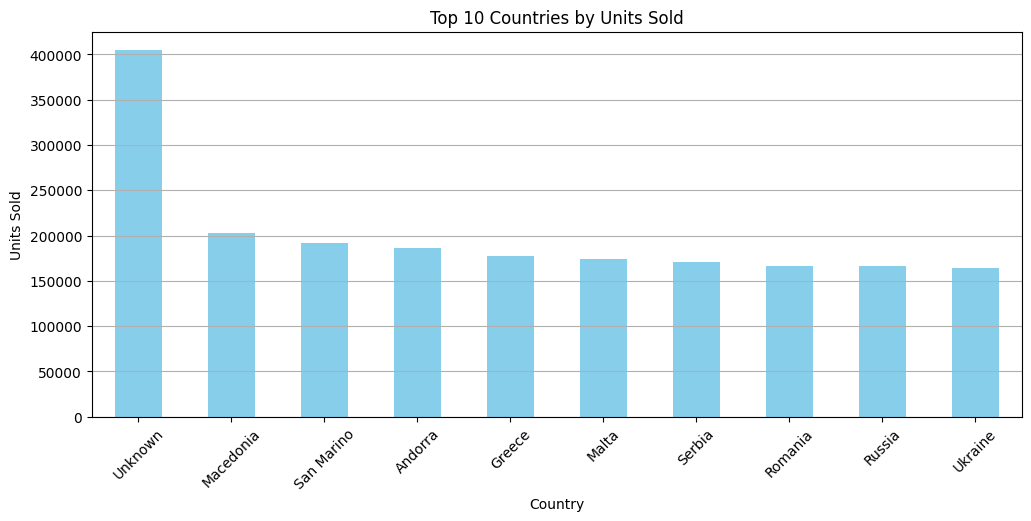

In [ ]:
plt.figure(figsize=(12, 5))
country_sales.sort_values("Units Sold", ascending=False).head(10).plot(
    x="name", y="Units Sold", kind="bar", figsize=(12, 5), legend=False, color="skyblue")
plt.title("Top 10 Countries by Units Sold")
plt.xlabel("Country")
plt.ylabel("Units Sold")
plt.xticks(rotation=45)
plt.grid(axis="y")
plt.show()

*A large portion of sales is marked as 'Unknown,' indicating missing or untracked country data. Among identified locations, Macedonia leads, followed by several European countries with similar sales volumes*

**Top 10 Countries By Profit**

<Figure size 1200x500 with 0 Axes>

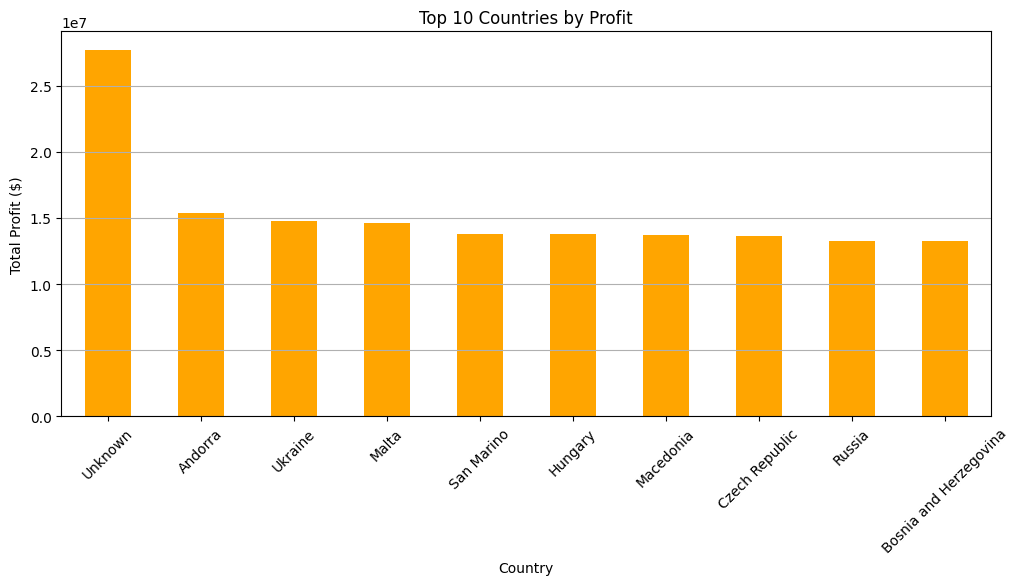

In [ ]:
plt.figure(figsize=(12, 5))
country_sales.sort_values("Profit", ascending=False).head(10).plot(
    x="name", y="Profit", kind="bar", figsize=(12, 5), legend=False, color="orange")
plt.title("Top 10 Countries by Profit")
plt.xlabel("Country")
plt.ylabel("Total Profit ($)")
plt.xticks(rotation=45)
plt.grid(axis="y")
plt.show()

*The 'Unknown' category accounts for the highest profit, suggesting missing data impacts analysis. Among identified countries, Andorra and Ukraine generate the most profit, while others show relatively equal profitability*

**By Region**

In [ ]:
region_sales = df_merged.groupby("region").agg({
    "Units Sold": "sum",
    "Profit": "sum"
}).reset_index()

**Total Sales By Region**


<Figure size 1200x500 with 0 Axes>

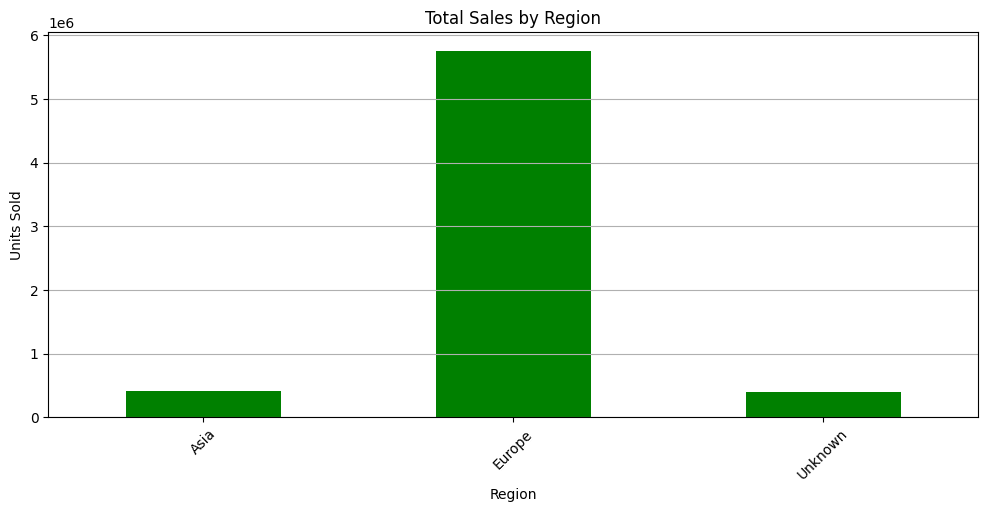

In [ ]:
plt.figure(figsize=(12, 5))
region_sales.plot(
    x="region", y="Units Sold", kind="bar", figsize=(12, 5), legend=False, color="green")
plt.title("Total Sales by Region")
plt.xlabel("Region")
plt.ylabel("Units Sold")
plt.xticks(rotation=45)
plt.grid(axis="y")

*Europe dominates total sales, significantly outperforming Asia and the 'Unknown' category. This suggests a primary market focus on European regions*

**Profit By Region**

<Figure size 1200x500 with 0 Axes>

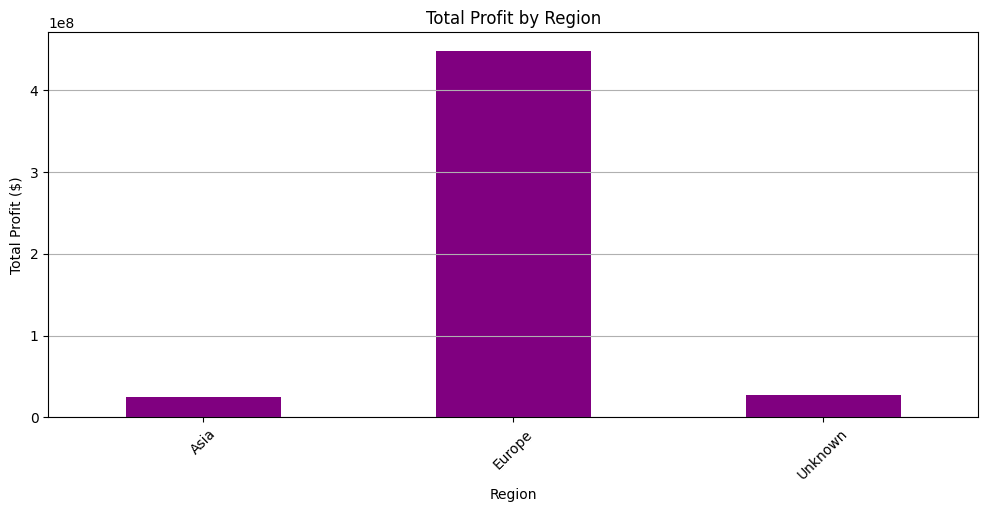

In [ ]:
plt.figure(figsize=(12, 5))
region_sales.plot(
    x="region", y="Profit", kind="bar", figsize=(12, 5), legend=False, color="purple")
plt.title("Total Profit by Region")
plt.xlabel("Region")
plt.ylabel("Total Profit ($)")
plt.xticks(rotation=45)
plt.grid(axis="y")
plt.show()

*Europe dominates total profit, significantly outperforming Asia and the 'Unknown' category. This suggests a primary market focus on European regions*

**By Sales Channel**

In [ ]:
channel_sales = df_merged.groupby("Sales Channel").agg({
    "Units Sold": "sum",
    "Profit": "sum"
}).reset_index()

**Sales By Channel**

<Figure size 700x500 with 0 Axes>

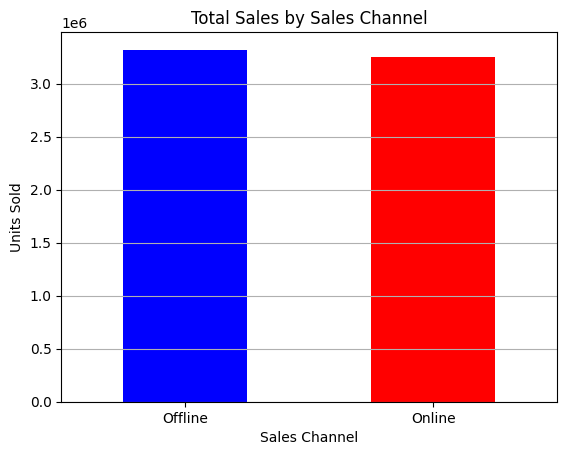

In [ ]:
plt.figure(figsize=(7, 5))
channel_sales.plot(
    x="Sales Channel", y="Units Sold", kind="bar", legend=False, color=["blue", "red"])
plt.title("Total Sales by Sales Channel")
plt.xlabel("Sales Channel")
plt.ylabel("Units Sold")
plt.xticks(rotation=0)
plt.grid(axis="y")
plt.show()
#graphic shows two categories "Online" and "online" that we missed when clearing data, lets fix that
df_merged['Sales Channel'] = df_merged['Sales Channel'].str.strip().str.title()



**Rebuilding the graph**

<Figure size 700x500 with 0 Axes>

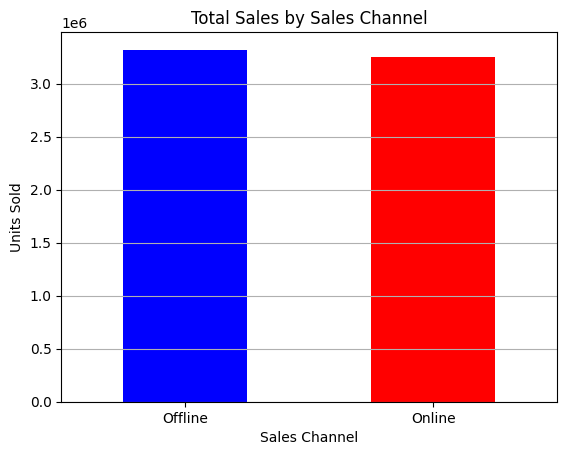

In [ ]:
channel_sales = df_merged.groupby("Sales Channel").agg({
    "Units Sold": "sum",
    "Profit": "sum"
}).reset_index()

plt.figure(figsize=(7, 5))
channel_sales.plot(
    x="Sales Channel", y="Units Sold", kind="bar", legend=False, color=["blue", "red"])
plt.title("Total Sales by Sales Channel")
plt.xlabel("Sales Channel")
plt.ylabel("Units Sold")
plt.xticks(rotation=0)
plt.grid(axis="y")
plt.show()

*Sales are nearly balanced between offline and online channels, indicating that both distribution methods are equally important for the business.*

**By Profit**

<Figure size 700x500 with 0 Axes>

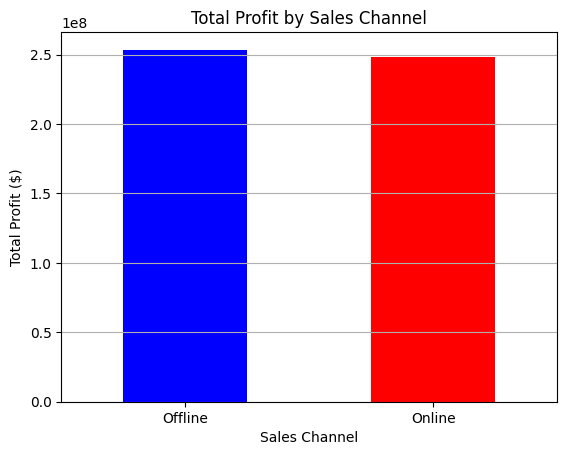

In [ ]:
plt.figure(figsize=(7, 5))
channel_sales.plot(
    x="Sales Channel", y="Profit", kind="bar", legend=False, color=["blue", "red"])
plt.title("Total Profit by Sales Channel")
plt.xlabel("Sales Channel")
plt.ylabel("Total Profit ($)")
plt.xticks(rotation=0)
plt.grid(axis="y")
plt.show()

*Profit margins are almost identical between offline and online sales, confirming that both channels are equally profitable and well-optimized.*

**Online Vs Offline**

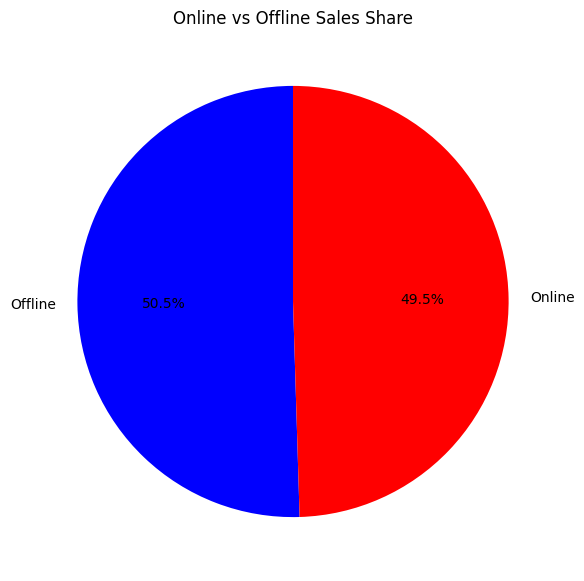

In [ ]:
plt.figure(figsize=(7, 7))
plt.pie(channel_sales["Units Sold"], labels=channel_sales["Sales Channel"],
        autopct="%1.1f%%", colors=["blue", "red"], startangle=90)
plt.title("Online vs Offline Sales Share")
plt.show()

*Sales are almost evenly split between online and offline channels, suggesting a well-balanced distribution strategy with no clear dominance.*

**Lets calculate shipping interval**

In [ ]:
df_merged["Shipping Delay (Days)"] = (df_merged["Ship Date"] - df_merged["Order Date"]).dt.days

**Shipping Interval by Product Category**

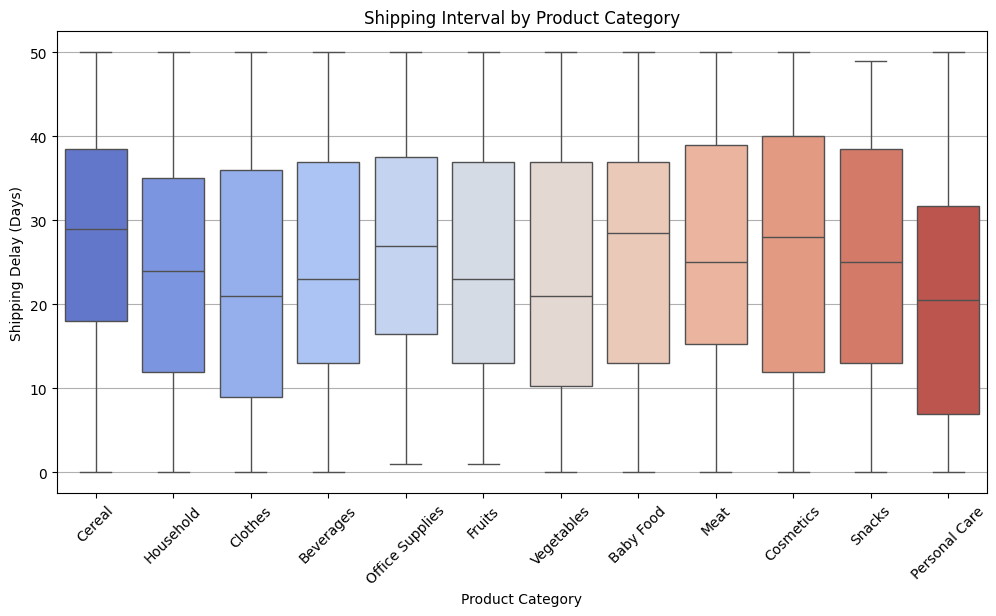

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x="item_type", y="Shipping Delay (Days)", data=df_merged, hue="item_type", palette="coolwarm", dodge=False)
plt.xticks(rotation=45)
plt.title("Shipping Interval by Product Category")
plt.xlabel("Product Category")
plt.ylabel("Shipping Delay (Days)")
plt.grid(axis="y")
plt.legend([],[], frameon=False)
plt.show()



*Shipping delays vary significantly across categories, with Cereal and Cosmetics experiencing the longest wait times, while Personal Care tends to ship faster*

**Average Shipping Interval**

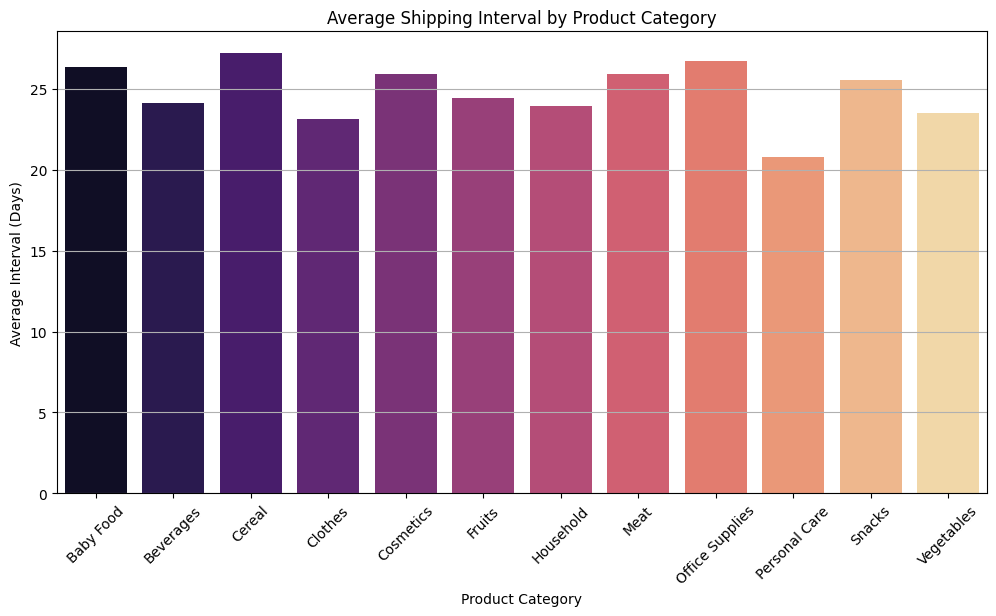

In [ ]:
plt.figure(figsize=(12, 6))
category_avg_delay = df_merged.groupby("item_type")["Shipping Delay (Days)"].mean().reset_index()

sns.barplot(x="item_type", y="Shipping Delay (Days)", hue="item_type", data=category_avg_delay, dodge=False, palette="magma")

plt.xticks(rotation=45)
plt.title("Average Shipping Interval by Product Category")
plt.xlabel("Product Category")
plt.ylabel("Average Interval (Days)")
plt.grid(axis="y")
plt.legend([],[], frameon=False)
plt.show()


*Baby Food and Cereal have the longest average shipping intervals, while Personal Care products ship the fastest, suggesting potential supply chain differences between categories*

**Now, shipping interval by Countries**

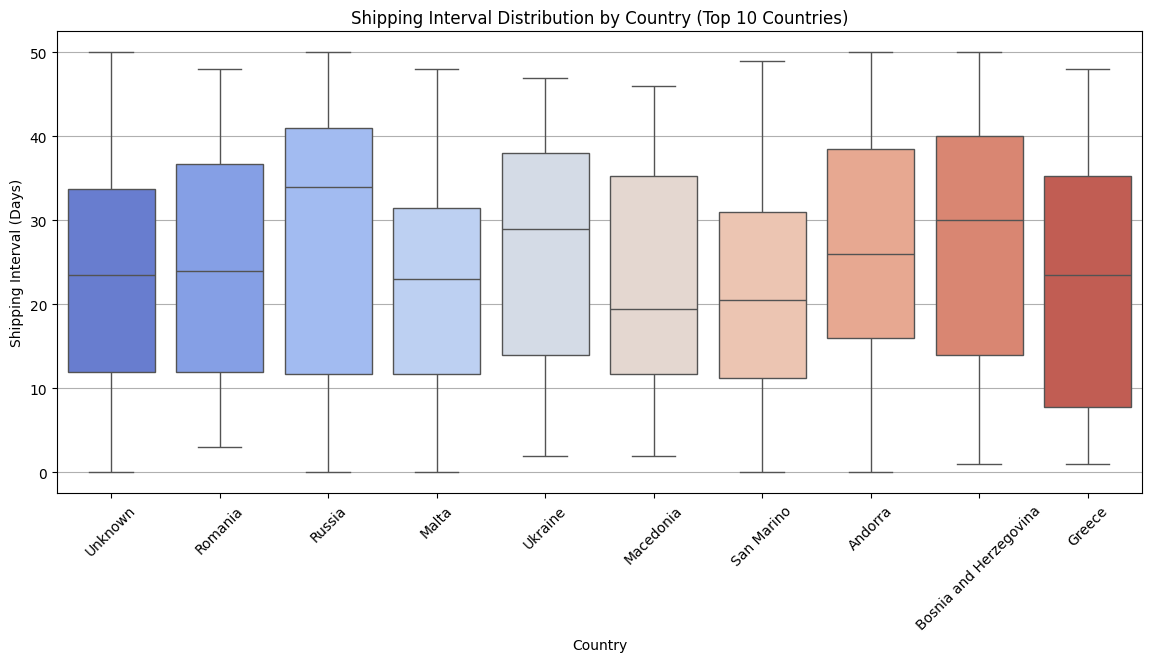

In [ ]:
plt.figure(figsize=(14, 6))
top_countries = df_merged["name"].value_counts().head(10).index
df_top_countries = df_merged[df_merged["name"].isin(top_countries)]

sns.boxplot(x="name", y="Shipping Delay (Days)", hue="name", data=df_top_countries, palette="coolwarm")

plt.xticks(rotation=45)
plt.title("Shipping Interval Distribution by Country (Top 10 Countries)")
plt.xlabel("Country")
plt.ylabel("Shipping Interval (Days)")
plt.grid(axis="y")
plt.legend([],[], frameon=False)
plt.show()


*Shipping times vary significantly across countries, with Bosnia and Herzegovina, Andorra, and Russia experiencing the longest delays, while San Marino and Malta tend to have faster deliveries.*

**Average Shipping Interval by Country**

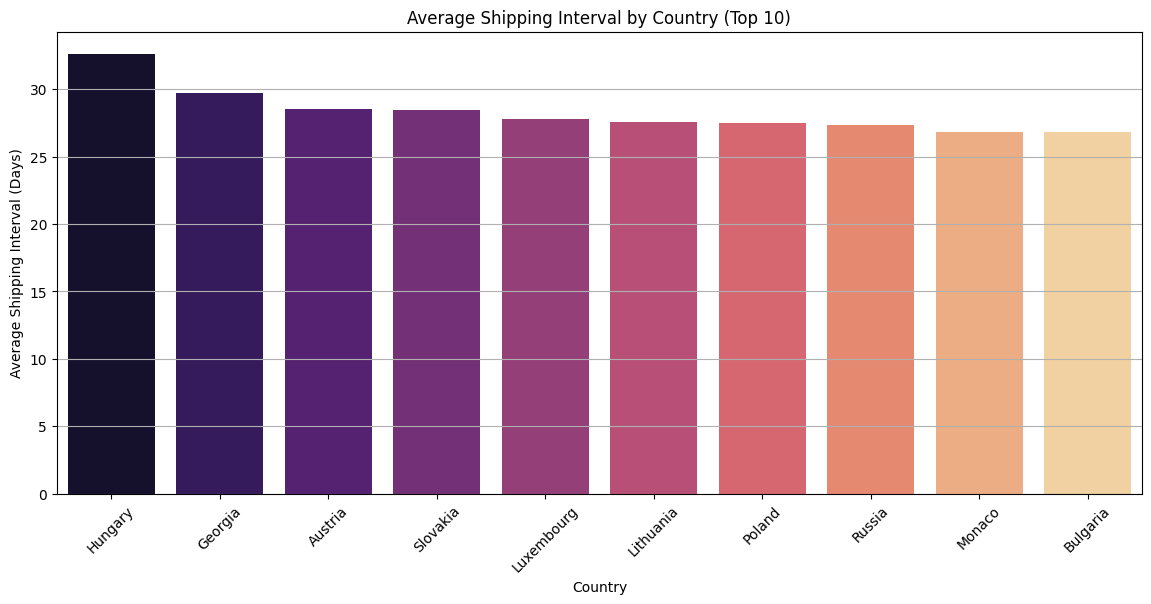

In [ ]:
plt.figure(figsize=(14, 6))
country_avg_interval = df_merged.groupby("name")["Shipping Delay (Days)"].mean().reset_index()
top_countries_avg = country_avg_interval.sort_values("Shipping Delay (Days)", ascending=False).head(10)

sns.barplot(x="name", y="Shipping Delay (Days)", hue="name", data=top_countries_avg, dodge=False, palette="magma")

plt.xticks(rotation=45)
plt.title("Average Shipping Interval by Country (Top 10)")
plt.xlabel("Country")
plt.ylabel("Average Shipping Interval (Days)")
plt.grid(axis="y")
plt.legend([],[], frameon=False)
plt.show()


*Hungary has the longest average shipping interval, followed closely by Georgia and Austria. The overall shipping times across these top 10 countries remain relatively high, suggesting possible logistics inefficiencies or customs delays*

**By Regions**


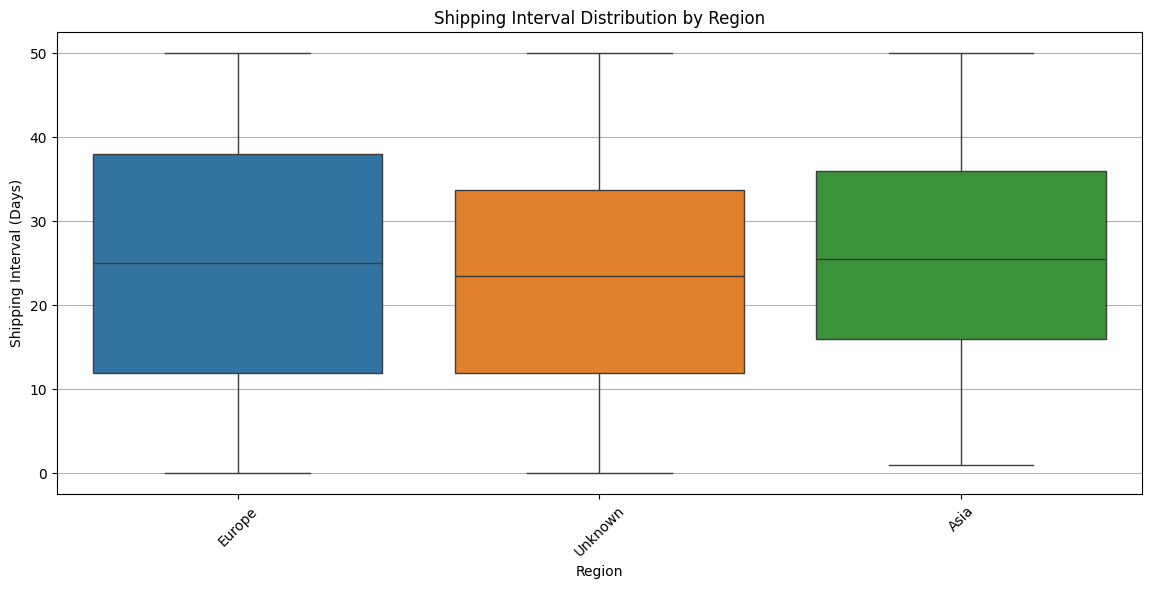

In [ ]:
plt.figure(figsize=(14, 6))
sns.boxplot(x="region", y="Shipping Delay (Days)", hue="region", data=df_merged, legend=False)
plt.xticks(rotation=45)
plt.title("Shipping Interval Distribution by Region")
plt.xlabel("Region")
plt.ylabel("Shipping Interval (Days)")
plt.grid(axis="y")
plt.show()

*The shipping intervals across regions show noticeable variation. Europe and Asia have a wider spread of shipping times, with Europe having the highest median delay. The "Unknown" region has a slightly more consistent shipping time, but still exhibits a broad range, indicating variability in fulfillment efficiency.*

**Average Shipping Interval by Region**

<ipython-input-109-999278d6c4ba>:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Region")


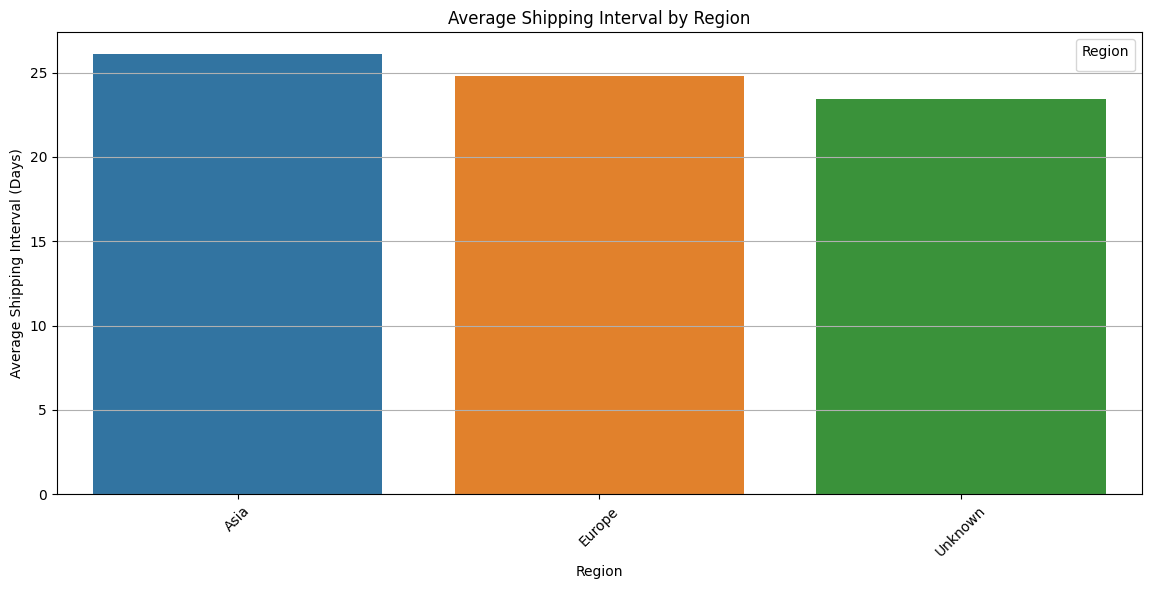

In [ ]:
plt.figure(figsize=(14, 6))
region_avg_interval = df_merged.groupby("region")["Shipping Delay (Days)"].mean().reset_index()

sns.barplot(x="region", y="Shipping Delay (Days)", hue="region", data=region_avg_interval,)
plt.xticks(rotation=45)
plt.title("Average Shipping Interval by Region")
plt.xlabel("Region")
plt.ylabel("Average Shipping Interval (Days)")
plt.grid(axis="y")
plt.legend(title="Region")
plt.show()


*Asia has the longest average shipping interval, followed closely by Europe, while the Unknown region has the shortest average shipping time. This might indicate better logistics efficiency in the "Unknown" category or missing data affecting the results*

In [ ]:
#createing shipping interval categories
df_merged["Shipping Interval Category"] = pd.cut(df_merged["Shipping Delay (Days)"],
                                                 bins=[0, 5, 10, 15, 20, 30, 100],
                                                 labels=["0-5 days", "6-10 days", "11-15 days", "16-20 days", "21-30 days", "30+ days"])

# average profit for each category of intervals
profit_by_shipping = df_merged.groupby("Shipping Interval Category")["Profit"].mean().reset_index()

<ipython-input-89-0fb3421d6229>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  profit_by_shipping = df_merged.groupby("Shipping Interval Category")["Profit"].mean().reset_index()


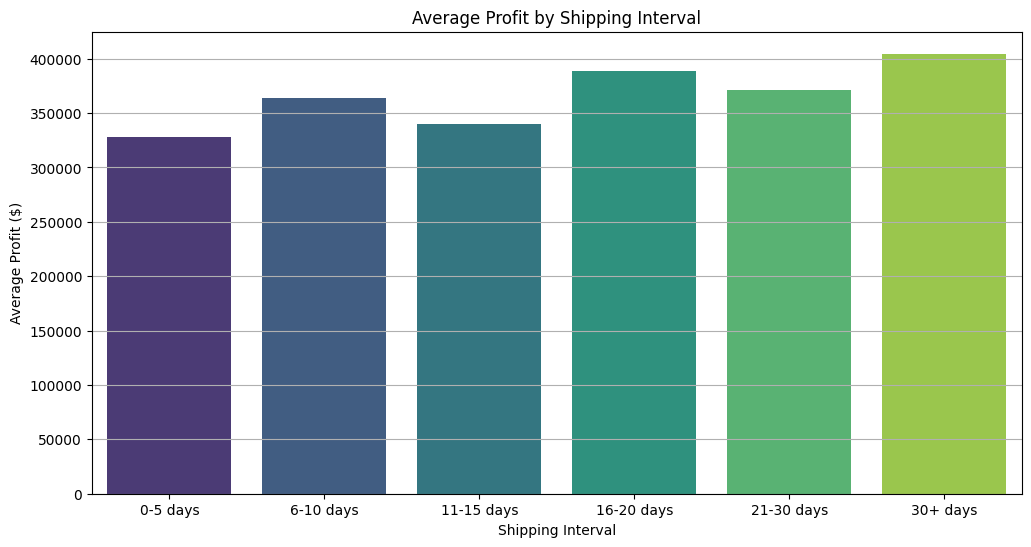

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x="Shipping Interval Category", y="Profit", hue="Shipping Interval Category", data=profit_by_shipping, palette="viridis", legend=False)

plt.title("Average Profit by Shipping Interval")
plt.xlabel("Shipping Interval")
plt.ylabel("Average Profit ($)")
plt.grid(axis="y")
plt.show()


 *Longer shipping intervals tend to have higher average profits, with the highest profit observed for orders taking 30+ days to ship. This could indicate that high-value or bulk orders require longer processing times*.

**Scatter Plot**

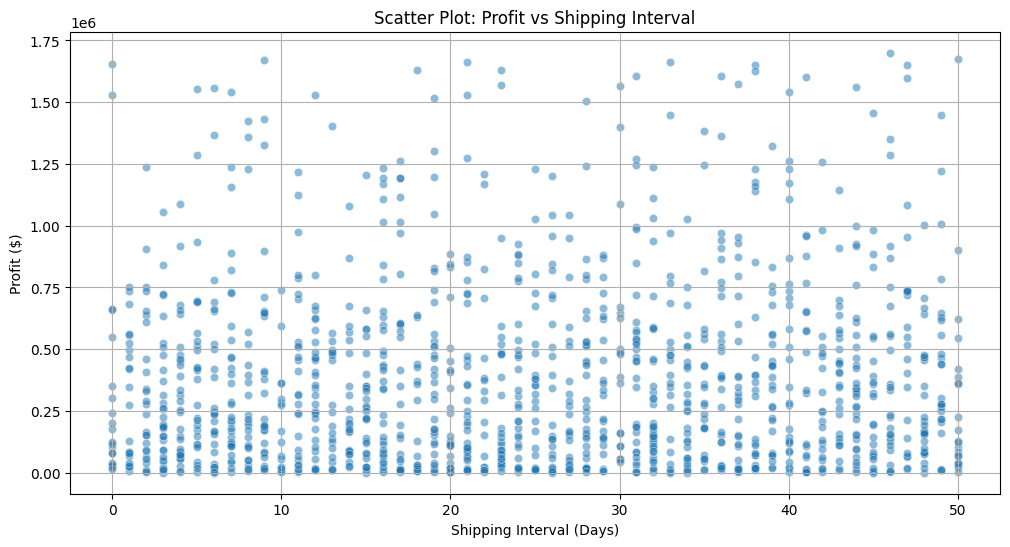

In [ ]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x="Shipping Delay (Days)", y="Profit", data=df_merged, alpha=0.5)
plt.title("Scatter Plot: Profit vs Shipping Interval")
plt.xlabel("Shipping Interval (Days)")
plt.ylabel("Profit ($)")
plt.grid(True)
plt.show()


*The scatter plot suggests no strong correlation between profit and shipping interval, though high-profit orders are present across various shipping times. Some of the highest profits occur at longer intervals, but overall, the distribution appears widespread.*

**Analysing the sales Dynamics**

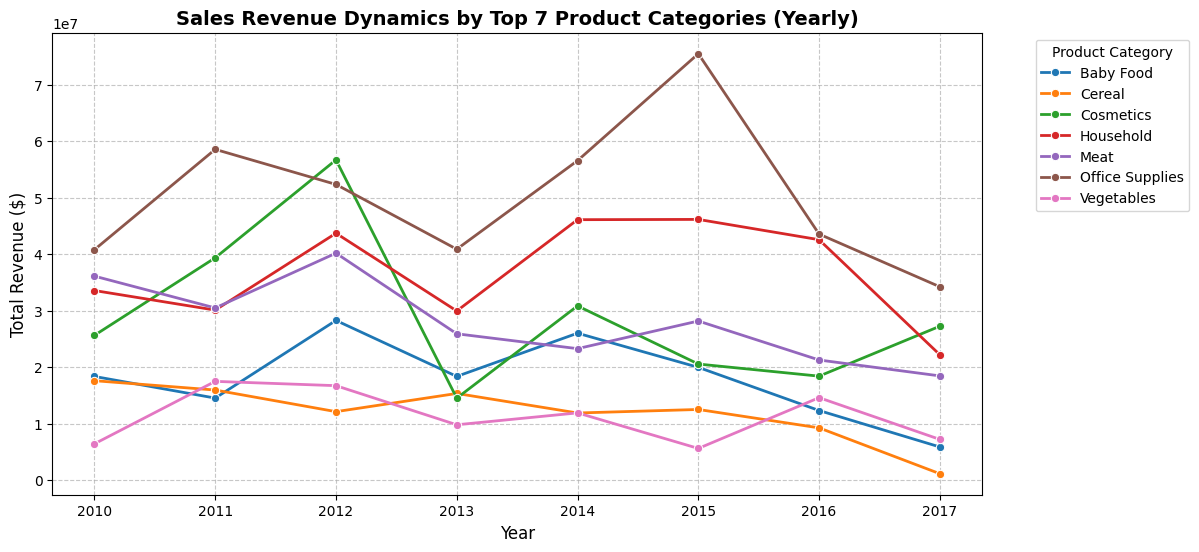

In [ ]:
# creating year column
df_merged["Year"] = df_merged["Order Date"].dt.year

# calculating revenue
df_merged["Revenue"] = df_merged["Units Sold"] * df_merged["Unit Price"]

# using top 7 categories, for graph to be more visually pleasing
top_categories = df_merged.groupby("item_type")["Revenue"].sum().sort_values(ascending=False).head(7).index
df_top_categories = df_merged[df_merged["item_type"].isin(top_categories)]

# aggregating
category_trend_yearly = df_top_categories.groupby(["Year", "item_type"])["Revenue"].sum().reset_index()

# building the graph
plt.figure(figsize=(12, 6))
sns.lineplot(x="Year", y="Revenue", hue="item_type", data=category_trend_yearly, palette="tab10", linewidth=2, marker="o")

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Total Revenue ($)", fontsize=12)
plt.title("Sales Revenue Dynamics by Top 7 Product Categories (Yearly)", fontsize=14, fontweight="bold")
plt.legend(title="Product Category", fontsize=10, bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(True, linestyle="--", alpha=0.7)

plt.show()


*The revenue trends show fluctuations across years, with Office Supplies peaking around 2015 before declining sharply. Household and Cosmetics also saw strong periods but dropped after 2016. Cereal and Vegetables remained relatively low, indicating lower overall revenue*

**Sales Dynamic By Country**


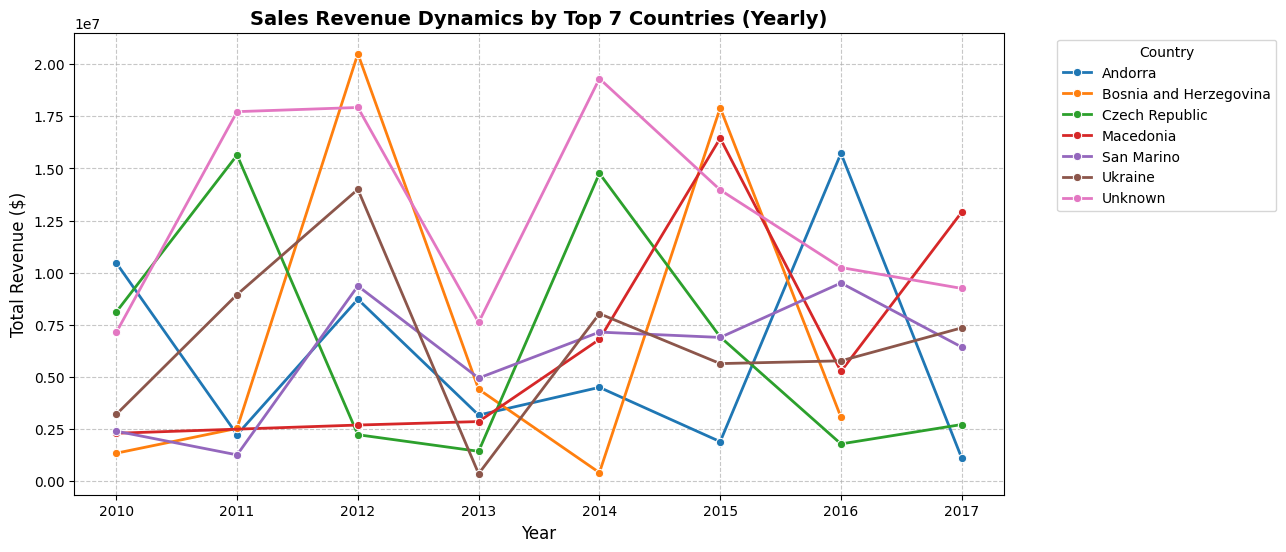

In [ ]:
#top 7 countries
top_countries = df_merged.groupby("name")["Revenue"].sum().sort_values(ascending=False).head(7).index

df_top_countries = df_merged[df_merged["name"].isin(top_countries)]

country_trend_yearly = df_top_countries.groupby(["Year", "name"])["Revenue"].sum().reset_index()

#building the graph
plt.figure(figsize=(12, 6))
sns.lineplot(x="Year", y="Revenue", hue="name", data=country_trend_yearly, palette="tab10", linewidth=2, marker="o")

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Total Revenue ($)", fontsize=12)
plt.title("Sales Revenue Dynamics by Top 7 Countries (Yearly)", fontsize=14, fontweight="bold")
plt.legend(title="Country", fontsize=10, bbox_to_anchor=(1.05, 1), loc="upper left")

plt.grid(True, linestyle="--", alpha=0.7)

plt.show()


*Revenue trends across countries are highly volatile, with Bosnia and Herzegovina, Czech Republic, and Ukraine showing significant spikes in certain years. Macedonia and San Marino had more consistent growth, while Andorra and Unknown displayed erratic revenue fluctuations.*

**Sales Dynamics By Region**

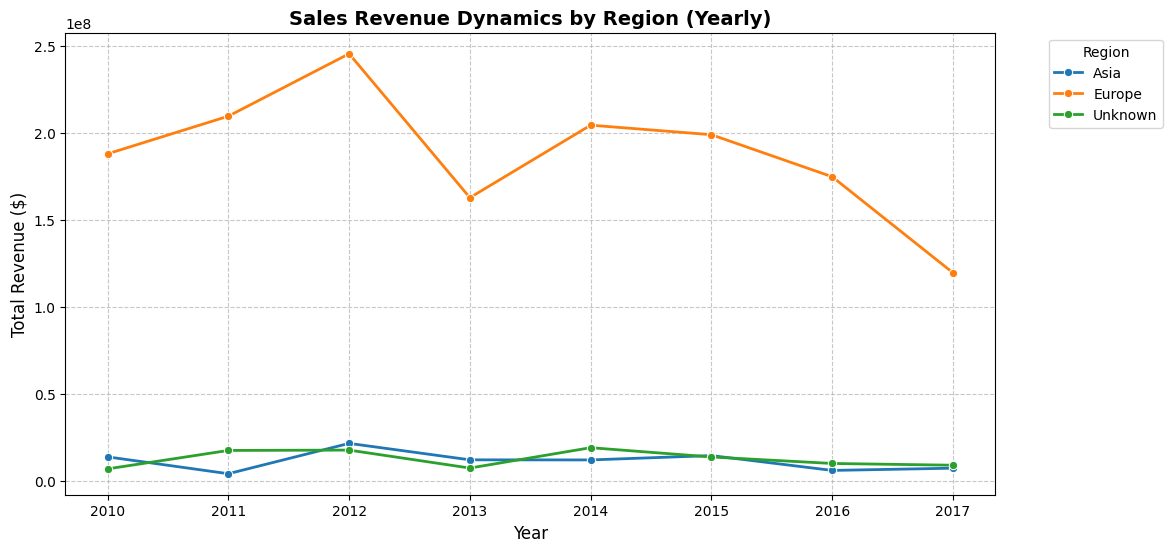

In [ ]:
region_trend_yearly = df_merged.groupby(["Year", "region"])["Revenue"].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x="Year", y="Revenue", hue="region", data=region_trend_yearly, palette="tab10", linewidth=2, marker="o")

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Total Revenue ($)", fontsize=12)
plt.title("Sales Revenue Dynamics by Region (Yearly)", fontsize=14, fontweight="bold")
plt.legend(title="Region", fontsize=10, bbox_to_anchor=(1.05, 1), loc="upper left")

plt.grid(True, linestyle="--", alpha=0.7)

plt.show()


*Europe dominates sales revenue, peaking in 2012 and showing a gradual decline after 2014. Asia and Unknown regions have significantly lower revenue, with minor fluctuations over the years.*

**Sales By Day Of The Week**


In [ ]:
# creating day of the week column using day_name()
df_merged["Day of Week"] = df_merged["Order Date"].dt.day_name()


**Sales By Day Of The Week Bar Chart**


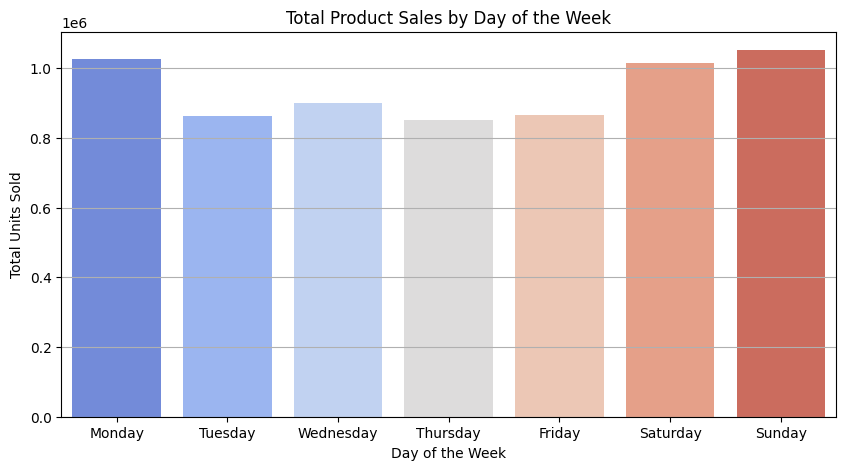

In [ ]:
day_sales = (
    df_merged.groupby("Day of Week")["Units Sold"]
    .sum()
    .reindex(["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
    .reset_index()
)

# Plotting sales by day of the week
plt.figure(figsize=(10, 5))
sns.barplot(x="Day of Week", y="Units Sold", data=day_sales, hue="Day of Week", palette="coolwarm", legend=False)
plt.title("Total Product Sales by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Total Units Sold")
plt.grid(axis="y")
plt.show()


*This graph shows that sales peak on Sundays and Saturdays, indicating higher demand over the weekend. Mondays also have strong sales, suggesting a possible carryover effect from the weekend. Midweek sales remain relatively stable but slightly lower, with Thursday being the lowest sales day*

**Is there seasonal products?**

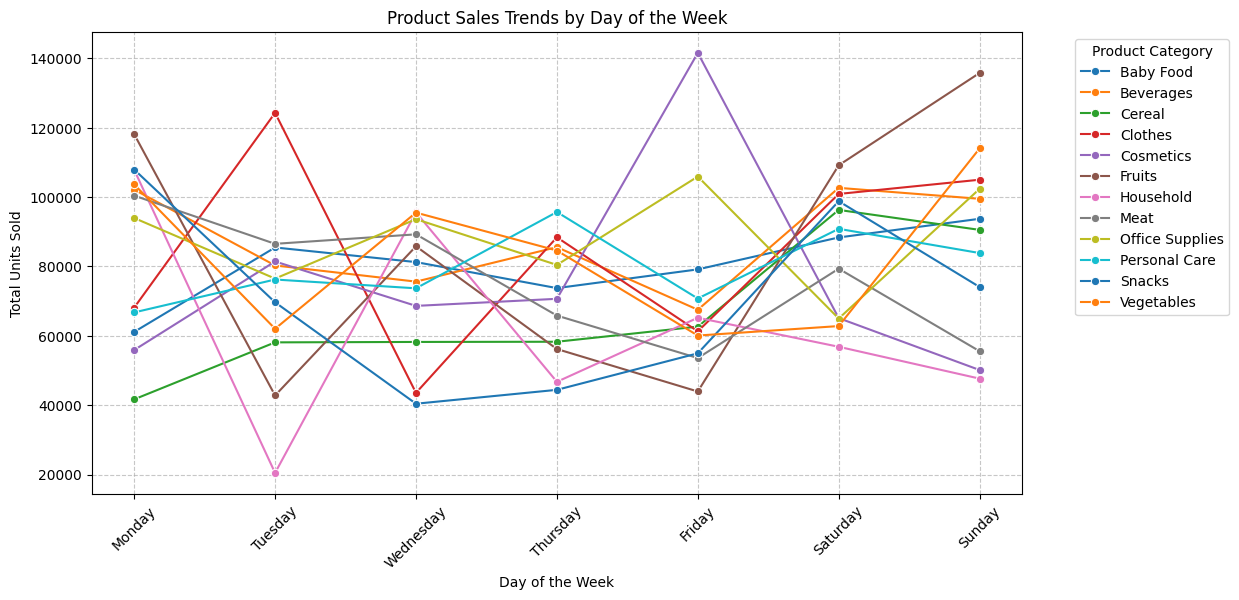

In [ ]:
#Establish the right consequence of the days of the week
ordered_days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
top_seasonal_categories = df_merged.groupby(["Day of Week", "item_type"])["Units Sold"].sum().reset_index()
top_seasonal_categories["Day of Week"] = pd.Categorical(top_seasonal_categories["Day of Week"], categories=ordered_days, ordered=True)


plt.figure(figsize=(12, 6))
sns.lineplot(x="Day of Week", y="Units Sold", hue="item_type",
             data=top_seasonal_categories, palette="tab10", marker="o")

plt.title("Product Sales Trends by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Total Units Sold")
plt.xticks(rotation=45)
plt.grid(True, linestyle="--", alpha=0.7)
plt.legend(title="Product Category", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()



*The sales trends across product categories show significant fluctuations throughout the week. Some categories, like Fruits and Vegetables, peak on weekends, indicating higher demand for fresh produce. Others, such as Cosmetics and Clothes, have inconsistent spikes, possibly linked to promotions or shopping habits. Office Supplies see midweek peaks, suggesting business-related purchases*

**SUMMARY**

The overall business performance reveals distinct trends across product categories, regions, sales channels, and time-based factors. Office Supplies, Beverages, and Fruits are the top-selling categories by units, yet Cosmetics, Office Supplies, and Household products generate the highest profits. Despite high sales volume, certain categories such as Meat and Snacks incur significant costs, potentially affecting profitability.

Regional Insights
Europe dominates in sales volume and revenue, but Asia and "Unknown" regions also contribute. The "Unknown" region represents transactions where location data is missing or improperly recorded. Its inclusion in the analysis helps to avoid data bias and identify potential reporting issues. If a significant portion of revenue or profit comes from "Unknown," it indicates a need to improve data accuracy in order processing.

Sales Channels & Timing
Sales are evenly split between online and offline channels, ensuring a balanced business model. While both channels contribute almost equally to revenue and profit, offline sales show slightly higher performance.

Seasonal and weekly sales patterns suggest that weekends drive higher sales, especially for fresh produce and personal items. Shipping intervals vary by category and country, with certain locations (Hungary, Georgia, and Austria) facing longer delivery times, potentially impacting customer satisfaction.

Shipping & Profitability
There is no clear negative correlation between longer shipping times and profit. In fact, products with extended shipping intervals, such as bulk or high-value items, tend to yield higher profits, suggesting that customers are willing to wait for premium or specialized goods.